In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,r2_score,accuracy_score,roc_auc_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.preprocessing import PowerTransformer, StandardScaler
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
df=pd.read_csv('car data.csv')

In [69]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [70]:
df.shape

(301, 9)

In [71]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [72]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [73]:
df.dropna(inplace=True)
df.shape

(301, 9)

In [74]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [75]:
df.shape

(299, 9)

In [76]:
num_col=df.select_dtypes(include='number')
cat_col=df.select_dtypes(include='object')
print(num_col)

     Year  Selling_Price  Present_Price  Kms_Driven  Owner
0    2014           3.35           5.59       27000      0
1    2013           4.75           9.54       43000      0
2    2017           7.25           9.85        6900      0
3    2011           2.85           4.15        5200      0
4    2014           4.60           6.87       42450      0
..    ...            ...            ...         ...    ...
296  2016           9.50          11.60       33988      0
297  2015           4.00           5.90       60000      0
298  2009           3.35          11.00       87934      0
299  2017          11.50          12.50        9000      0
300  2016           5.30           5.90        5464      0

[299 rows x 5 columns]


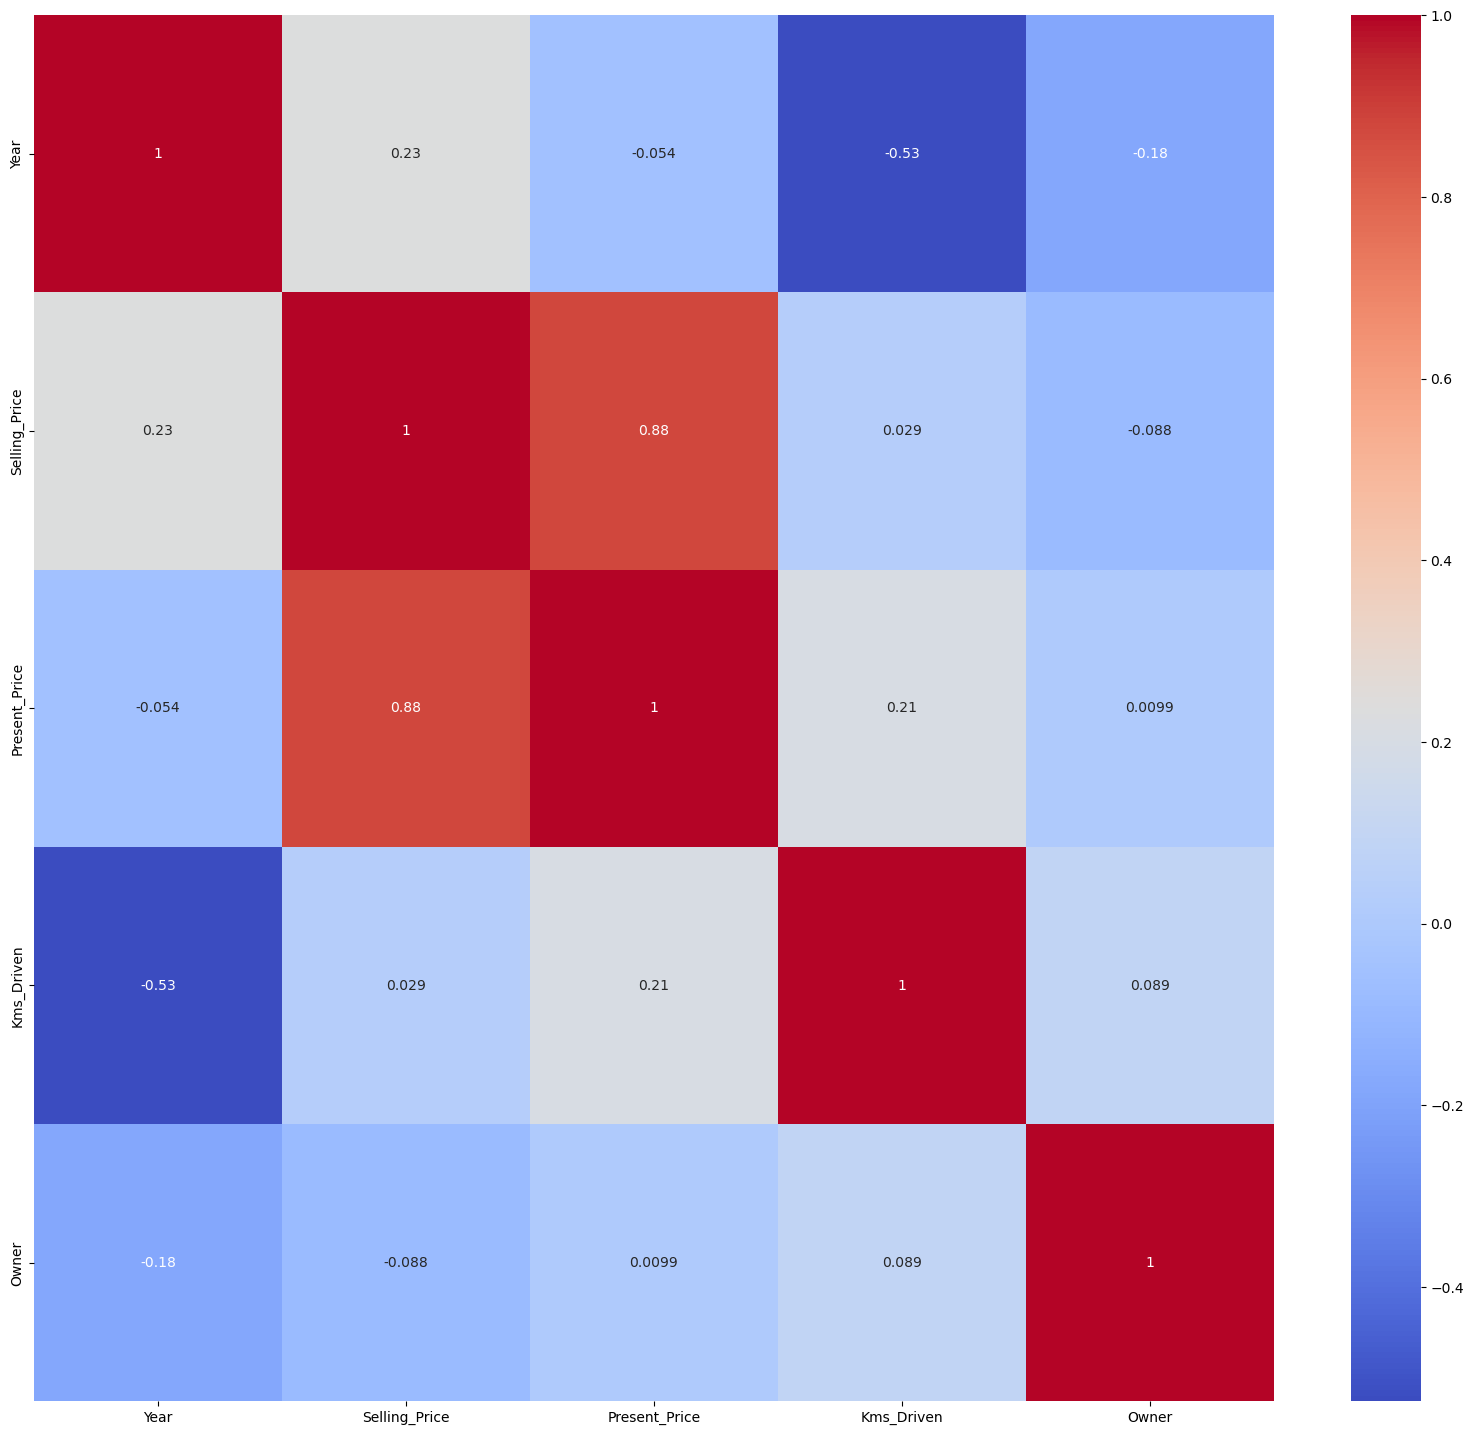

In [77]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()


-1.2368759011840527


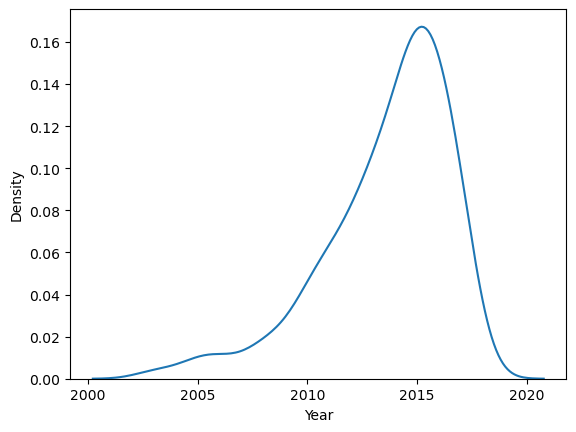

2.536521826497541


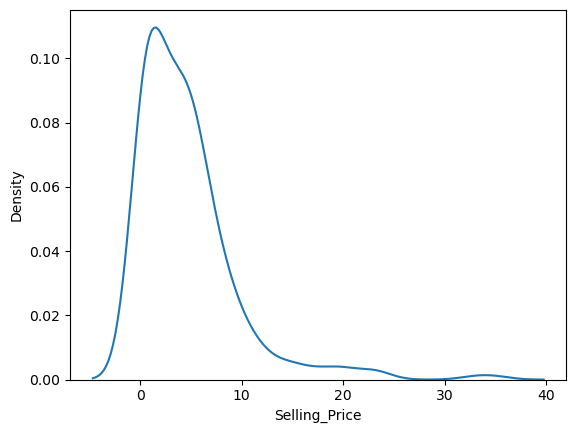

4.186894223914912


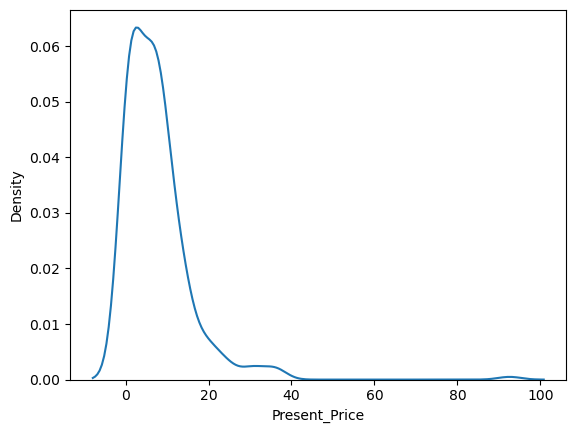

6.418134387971488


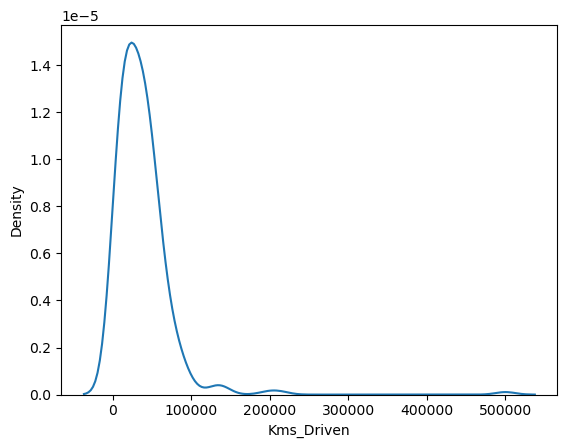

7.590604807858934


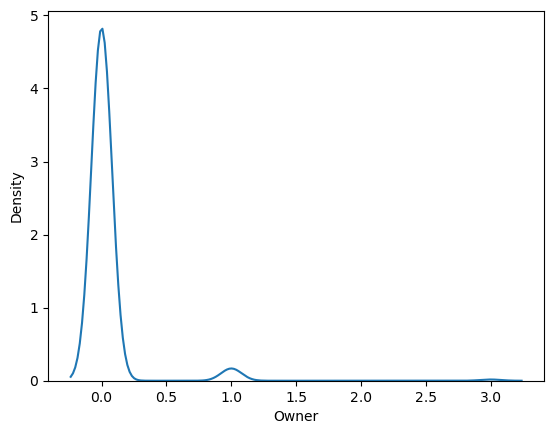

In [78]:
for col in num_col:
    print(num_col[col].skew())
    sns.kdeplot(df[col])
    plt.show()

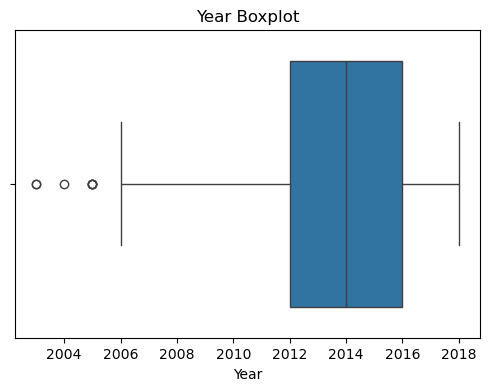

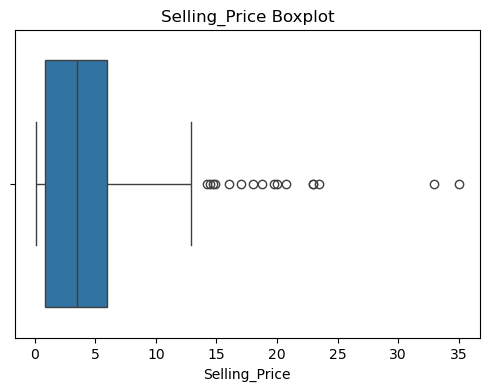

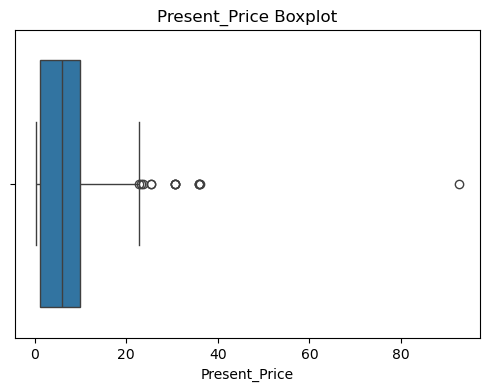

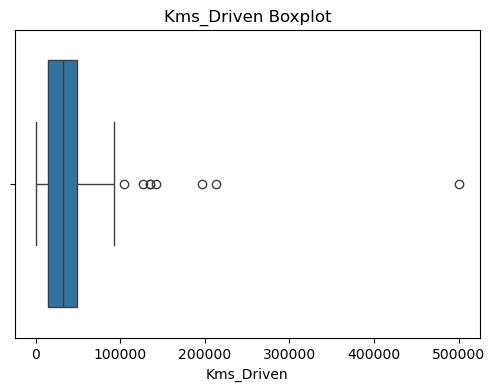

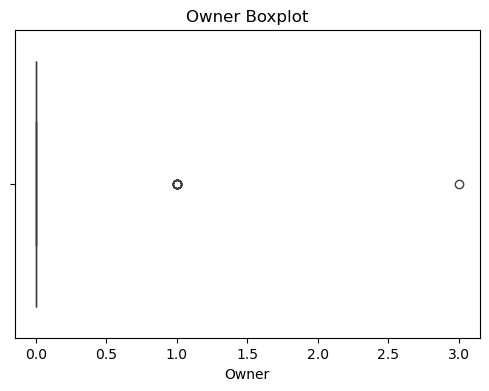

In [79]:
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()

In [80]:
numerical_cols_to_clean_outliers = ['Year', 'Owner','Kms_Driven', 'Selling_Price', 'Present_Price']

for col in numerical_cols_to_clean_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].copy()

print("Shape of the DataFrame after removing outliers from 'Year' and 'Owner':", df.shape)
display(df.head())

Shape of the DataFrame after removing outliers from 'Year' and 'Owner': (261, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [81]:
numerical_cols_to_transform = ['Kms_Driven', 'Selling_Price', 'Present_Price']

pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(df[numerical_cols_to_transform])
df[numerical_cols_to_transform] = transformed_data
display(df.head())

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,0.116985,0.174675,-0.046445,Petrol,Dealer,Manual,0
1,sx4,2013,0.530408,0.837260,0.651327,Diesel,Dealer,Manual,0
2,ciaz,2017,1.096765,0.880831,-1.313970,Petrol,Dealer,Manual,0
3,wagon r,2011,-0.057562,-0.142538,-1.478026,Petrol,Dealer,Manual,0
4,swift,2014,0.490355,0.415785,0.629549,Diesel,Dealer,Manual,0


In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
  df[col]=le.fit_transform(df[col])

In [83]:
df.drop(['Car_Name'], axis=1, inplace=True)

In [84]:
X = df.drop('Selling_Price', axis=1) 
y = df['Selling_Price']     
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GradientBoostingRegressor()

In [85]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor
models={
    "Gradient Boosting":GradientBoostingRegressor(),
    "XGBoost":XGBRegressor(eval_metric='logloss', random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=500, random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200)
    
}

In [94]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    n = X_test.shape[0]
    p = X_train.shape[1]

    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adj_r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")


Gradient Boosting
R² Score: 0.9844
Adjusted R² Score: 0.9819
MSE: 0.0149
RMSE: 0.1220

XGBoost
R² Score: 0.9801
Adjusted R² Score: 0.9770
MSE: 0.0190
RMSE: 0.1377

AdaBoost
R² Score: 0.9708
Adjusted R² Score: 0.9663
MSE: 0.0278
RMSE: 0.1667

Random Forest
R² Score: 0.9801
Adjusted R² Score: 0.9770
MSE: 0.0189
RMSE: 0.1376


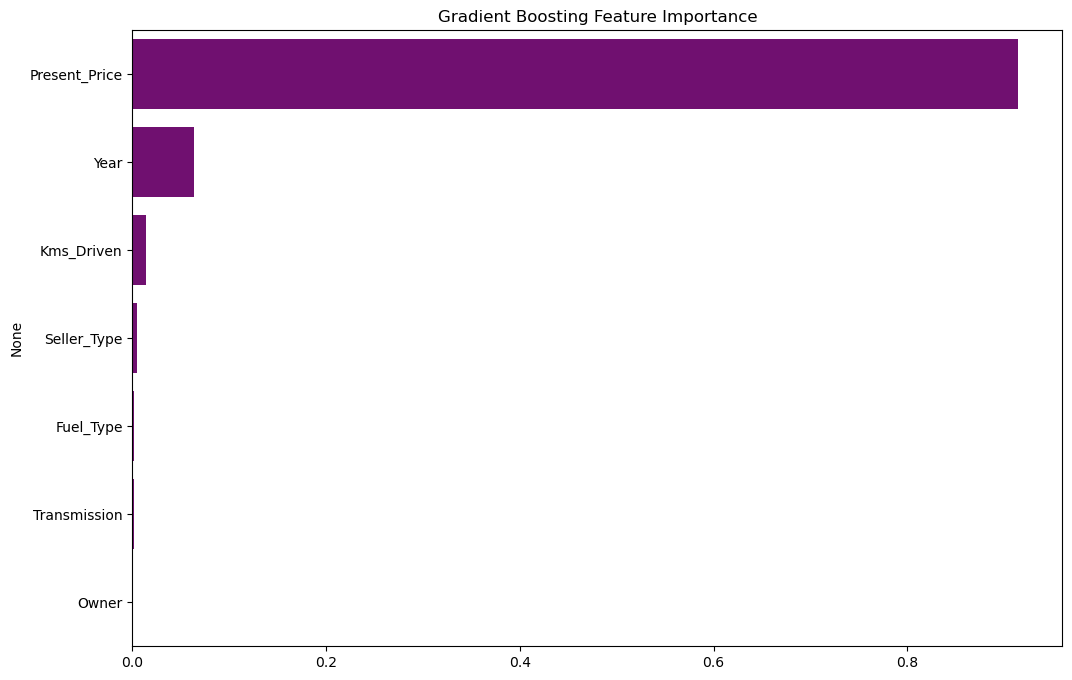

In [95]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp.values, y=feature_imp.index,color='purple')
plt.title("Gradient Boosting Feature Importance")
plt.show()

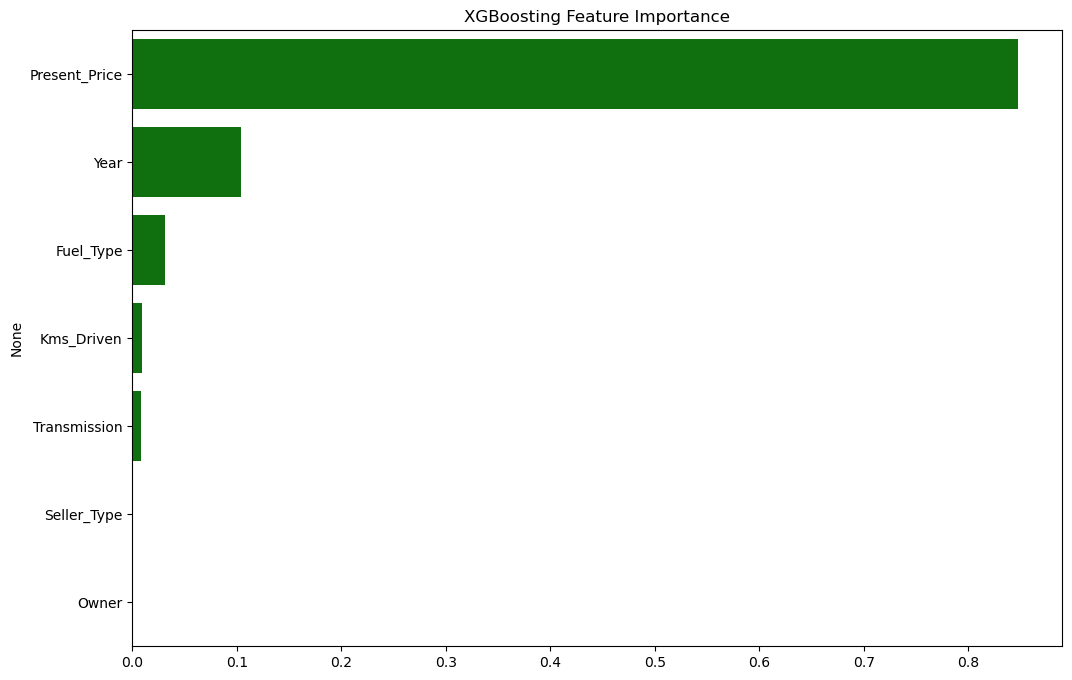

In [96]:
feature_imp = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp.values, y=feature_imp.index,color='green')
plt.title("XGBoosting Feature Importance")
plt.show()

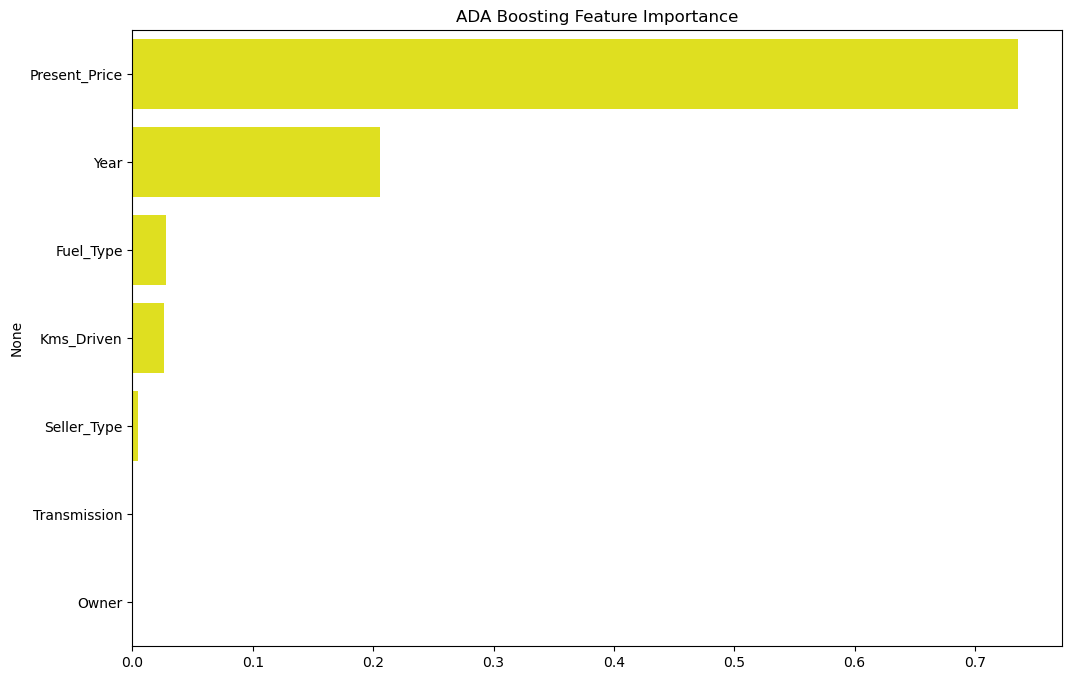

In [97]:
feature_imp = pd.Series(ab.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp.values, y=feature_imp.index,color='yellow')
plt.title("ADA Boosting Feature Importance")
plt.show()

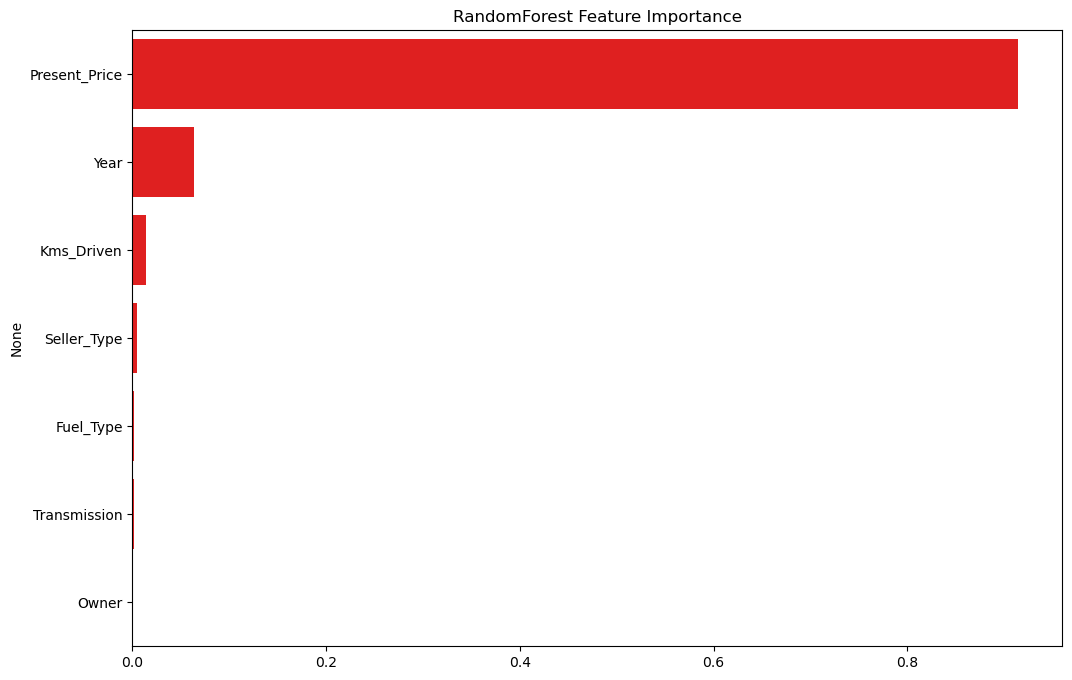

In [98]:
feature_imp = pd.Series(ran.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp.values, y=feature_imp.index,color='red')
plt.title("RandomForest Feature Importance")
plt.show()

# comparatively gradient boosting predicts the selling price with the high accuracy


In [99]:
import mlflow
import mlflow.sklearn
mlflow.set_experiment("car price prediction")

<Experiment: artifact_location='file:///k:/end%20to%20end%202/mlruns/877226742856463214', creation_time=1761561706895, experiment_id='877226742856463214', last_update_time=1761561706895, lifecycle_stage='active', name='car price prediction', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [100]:
from car import run_models

run_models(models, X_train, y_train, X_test, y_test)


Gradient Boosting
R² Score: 0.9845
Adjusted R² Score: 0.9821
MSE: 0.0148
RMSE: 0.1215
Run completed. Run ID: f2c3bee43010474b8c76f61984453620

XGBoost
R² Score: 0.9801
Adjusted R² Score: 0.9770
MSE: 0.0190
RMSE: 0.1377
Run completed. Run ID: 62efb59fada34268ab7c34a8d33948b6

AdaBoost
R² Score: 0.9708
Adjusted R² Score: 0.9663
MSE: 0.0278
RMSE: 0.1667
Run completed. Run ID: c5a0067f3bd04f92aff1c43e6f4e49a4

Random Forest
R² Score: 0.9801
Adjusted R² Score: 0.9770
MSE: 0.0189
RMSE: 0.1376
Run completed. Run ID: 60f46131296542c2bf51e9f7c6829c85
